In [1]:
!pip install fredapi

In [2]:
from sklearn import linear_model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from fredapi import Fred

Using API to access FRED data:

In [6]:
fred_key="b37c397744f2a08c1050255187b11116"

In [7]:
fred = Fred(api_key=fred_key)

Investigating FRED data:

In [8]:
fred.search('Germany',order_by='popularity').head(2)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CLVMNACSCAB1GQDE,CLVMNACSCAB1GQDE,2024-09-27,2024-09-27,Real Gross Domestic Product for Germany,1991-01-01,2024-04-01,Quarterly,Q,Millions of Chained 2010 Euros,Mil. of Chn. 2010 Euros,Seasonally Adjusted,SA,2024-09-06 04:01:02-05:00,63,Eurostat unit ID: CLV10_MNAC Eurostat item ID:...
QDER628BIS,QDER628BIS,2024-09-27,2024-09-27,Real Residential Property Prices for Germany,1970-01-01,2024-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2024-07-25 11:01:03-05:00,58,Source Code: Q:DE:R:628 Coverage includes all...


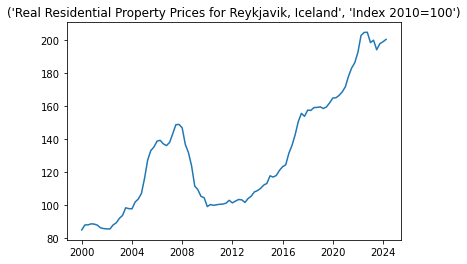

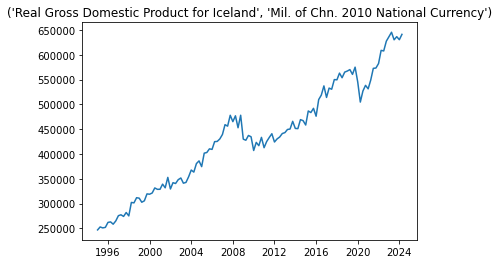

In [9]:
for n in fred.search('Iceland',order_by='popularity').head(2)['id']:
    plt.plot(fred.get_series(series_id=n))
    plt.title(label=(fred.search('Iceland',order_by='popularity').head(2)['title'].loc[n],fred.search('Iceland',order_by='popularity').head(2)['units_short'].loc[n]))
    plt.show()

Automate generating plots for country of interest:

In [10]:
def generate_plots(country, no_plots):
    for n in fred.search(country,order_by='popularity').head(no_plots)['id']:
        plt.plot(fred.get_series(series_id=n))
        plt.title(label=(fred.search(country,order_by='popularity').head(no_plots)['title'].loc[n],fred.search(country,order_by='popularity').head(no_plots)['units_short'].loc[n]))
        plt.show()

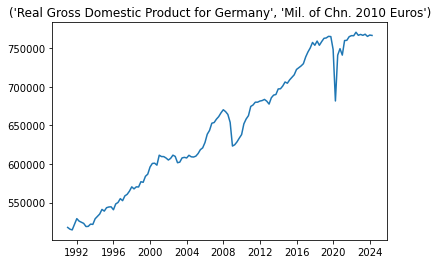

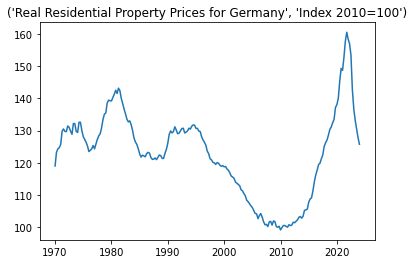

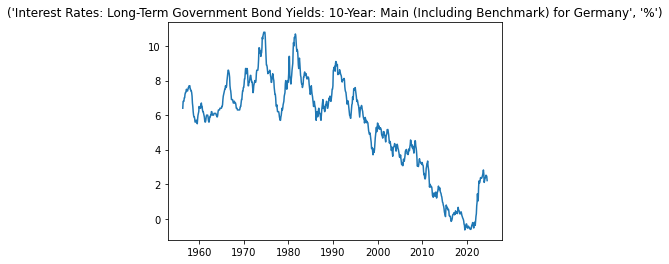

In [11]:
generate_plots('Germany',3)

Create Dataframe of several data sets:

In [12]:
fred.search('Germany',order_by='popularity').head(2)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CLVMNACSCAB1GQDE,CLVMNACSCAB1GQDE,2024-09-27,2024-09-27,Real Gross Domestic Product for Germany,1991-01-01,2024-04-01,Quarterly,Q,Millions of Chained 2010 Euros,Mil. of Chn. 2010 Euros,Seasonally Adjusted,SA,2024-09-06 04:01:02-05:00,63,Eurostat unit ID: CLV10_MNAC Eurostat item ID:...
QDER628BIS,QDER628BIS,2024-09-27,2024-09-27,Real Residential Property Prices for Germany,1970-01-01,2024-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2024-07-25 11:01:03-05:00,58,Source Code: Q:DE:R:628 Coverage includes all...


In [13]:
fred.get_series(series_id='QDER628BIS').head()

1970-01-01    118.9990
1970-04-01    123.2700
1970-07-01    124.3391
1970-10-01    124.7134
1971-01-01    125.7255
dtype: float64

In [14]:
df_data = pd.DataFrame()
for x in range(10):
    df_data[fred.search('Germany',order_by='popularity')['title'].iloc[x]] = fred.get_series(series_id=fred.search('Germany',order_by='popularity')['id'].iloc[x])   

In [15]:
df_data.head()

,Real Gross Domestic Product for Germany,Real Residential Property Prices for Germany,Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Germany,Global Economic Policy Uncertainty Index: Current Price Adjusted GDP,"Inflation, consumer prices for Germany",Gross Domestic Product for Germany,"Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Germany",Interest Rates: 3-Month or 90-Day Rates and Yields: Interbank Rates: Total for Germany,Gross Domestic Product for European Union (27 Countries from 2020)
1991-01-01,517733.8,129.6900,8.9275,NaN,4.047033,389789.0,63.99836,9.35,NaN
1991-04-01,515466.2,131.2034,8.3575,NaN,NaN,396859.0,64.55811,9.18,NaN
1991-07-01,514515.3,130.2082,8.6325,NaN,NaN,397814.0,65.86420,9.15,NaN
1991-10-01,521756.9,129.0285,8.3475,NaN,NaN,412335.0,66.89041,9.38,NaN
1992-01-01,529126.3,129.2252,7.9475,NaN,5.056978,422315.0,67.63675,9.53,NaN


In [16]:
df_data = df_data.dropna()

Reorder columns to put Residential Prices to first place:

In [17]:
col_list = df_data.columns.to_list()

In [18]:
col_list

['Real Gross Domestic Product for Germany',
 'Real Residential Property Prices for Germany',
 'Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Germany',
 'Global Economic Policy Uncertainty Index: Current Price Adjusted GDP',
 'Inflation, consumer prices for Germany',
 'Gross Domestic Product for Germany',
 'Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Germany',
 'Interest Rates: 3-Month or 90-Day Rates and Yields: Interbank Rates: Total for Germany',
 'Gross Domestic Product for European Union (27 Countries from 2020)']

In [19]:
add = col_list[0]
col_list = col_list[1:]
col_list.append(add)

In [20]:
col_list

['Real Residential Property Prices for Germany',
 'Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Germany',
 'Global Economic Policy Uncertainty Index: Current Price Adjusted GDP',
 'Inflation, consumer prices for Germany',
 'Gross Domestic Product for Germany',
 'Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Germany',
 'Interest Rates: 3-Month or 90-Day Rates and Yields: Interbank Rates: Total for Germany',
 'Gross Domestic Product for European Union (27 Countries from 2020)',
 'Real Gross Domestic Product for Germany']

In [21]:
df_data = df_data[col_list]

Linear regression for residential prices:

In [22]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 1997-01-01 to 2023-01-01
Data columns (total 9 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Real Residential Property Prices for Germany                                                       27 non-null     float64
 1   Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Germany  27 non-null     float64
 2   Global Economic Policy Uncertainty Index: Current Price Adjusted GDP                               27 non-null     float64
 3   Inflation, consumer prices for Germany                                                             27 non-null     float64
 4   Gross Domestic Product for Germany                                                                 27 non

In [32]:
df_data.corr()

,Real Residential Property Prices for Germany,Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Germany,Global Economic Policy Uncertainty Index: Current Price Adjusted GDP,"Inflation, consumer prices for Germany",Gross Domestic Product for Germany,"Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Germany",Interest Rates: 3-Month or 90-Day Rates and Yields: Interbank Rates: Total for Germany,Gross Domestic Product for European Union (27 Countries from 2020),Real Gross Domestic Product for Germany
Real Residential Property Prices for Germany,1.000000,-0.444576,0.649790,0.547694,0.592939,0.483795,-0.351395,0.477888,0.480759
Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Germany,-0.444576,1.000000,-0.798508,-0.154815,-0.869879,-0.846254,0.904015,-0.853772,-0.904111
Global Economic Policy Uncertainty Index: Current Price Adjusted GDP,0.649790,-0.798508,1.000000,0.377803,0.855766,0.825016,-0.649029,0.816464,0.823603
"Inflation, consumer prices for Germany",0.547694,-0.154815,0.377803,1.000000,0.508904,0.506146,-0.044056,0.512407,0.401060
Gross Domestic Product for Germany,0.592939,-0.869879,0.855766,0.508904,1.000000,0.983630,-0.733670,0.983574,0.973840
"Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Germany",0.483795,-0.846254,0.825016,0.506146,0.983630,1.000000,-0.721989,0.990532,0.951786
Interest Rates: 3-Month or 90-Day Rates and Yields: Interbank Rates: Total for Germany,-0.351395,0.904015,-0.649029,-0.044056,-0.733670,-0.721989,1.000000,-0.712242,-0.761474
Gross Domestic Product for European Union (27 Countries from 2020),0.477888,-0.853772,0.816464,0.512407,0.983574,0.990532,-0.712242,1.000000,0.968905
Real Gross Domestic Product for Germany,0.480759,-0.904111,0.823603,0.401060,0.973840,0.951786,-0.761474,0.968905,1.000000


In [33]:
reg = linear_model.LinearRegression()

In [84]:
X = np.array(df_data['Inflation, consumer prices for Germany']).reshape(-1,1)

In [85]:
Y = np.array(df_data['Real Residential Property Prices for Germany']).reshape(-1,1)

In [86]:
reg.fit(X,Y)

LinearRegression()

In [87]:
Y_p = reg.predict(X)

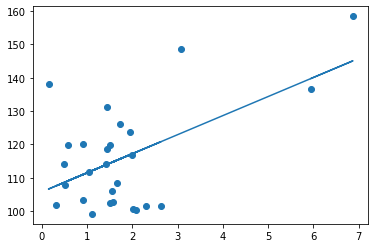

In [44]:
plt.scatter(X,Y)
plt.plot(X,Y_p)
plt.show()

In [45]:
reg.coef_, reg.intercept_

(array([[5.71536573]]), array([105.76949155]))

Multilinear regression:

In [98]:
X = df_data[['Global Economic Policy Uncertainty Index: Current Price Adjusted GDP',
             'Inflation, consumer prices for Germany',
             'Real Gross Domestic Product for Germany']]

In [100]:
reg.fit(X,Y)

LinearRegression()

In [101]:
Y_p = reg.predict(X)

In [112]:
df_data['pred_real_estate_prices'] = Y_p

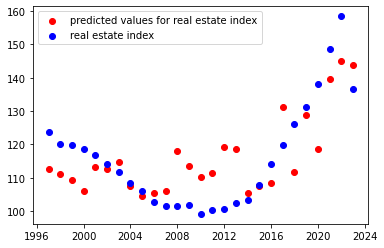

In [120]:
plt.scatter(df_data.index,df_data['pred_real_estate_prices'],label='predicted values for real estate index',color='r')
plt.scatter(df_data.index,df_data['Real Residential Property Prices for Germany'],label='real estate index',color='b')
plt.legend(loc='best')
plt.show()